In [1]:
using Dates 
periodstart = Date(2021, 1, 1)
periodend = Date(2021, 12, 31)

2021-12-31

In [2]:
using Pkg

Pkg.add("CSV")
Pkg.add("DataFrames")
Pkg.add("MarketData")
Pkg.add("Glob")
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("PlotlyJS")
Pkg.add("PlotlyBase")
Pkg.add("WebIO")

    Updating registry at `~/.julia/registries/General.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.7/Project.toml`
  No Changes to `~/.julia/environments/v1.7/Manifest.toml`
   Resolving package versions...
  No Ch

In [3]:
using CSV
using DataFrames
using MarketData
using Glob
using Statistics

In [4]:
tradefiles = glob("data/*-trades.csv")

5-element Vector{String}:
 "data/2017-trades.csv"
 "data/2018-trades.csv"
 "data/2019-trades.csv"
 "data/2020-trades.csv"
 "data/2021-trades.csv"

In [5]:
alltradesdf = reduce(vcat, DataFrame.(CSV.File.(tradefiles)));
alltradesdf[:,"VÄÄRTUSPÄEV"] = Date.(alltradesdf[:,"VÄÄRTUSPÄEV"])
alltradesdf[:,"TEHINGUPÄEV"] = Date.(alltradesdf[:,"TEHINGUPÄEV"])
alltradesdf = alltradesdf[in.(alltradesdf."TEHING", Ref(["ost", "müük"])), :]
# Replace temporary symbols
alltradesdf[alltradesdf."SÜMBOL" .== "EfTEN5", "SÜMBOL"] .= "EFT1T";

alltradesdf = sort!(alltradesdf, ["TEHINGUPÄEV"])

alltradesdf.CUMKOGUS .= 0
for sym in unique(alltradesdf[!,"SÜMBOL"])
    alltradesdf[alltradesdf."SÜMBOL" .== sym, "CUMKOGUS"] = cumsum(alltradesdf[alltradesdf."SÜMBOL" .== sym, "KOGUS"])
end
# alltradesdf[!, ["SÜMBOL", "TEHINGUPÄEV", "CUMKOGUS"]]

In [6]:
tickers = unique(alltradesdf[:,"SÜMBOL"])
function map_symbols(sym)
    if sym in ["SXR8", "VUSA"]
        return sym * ".DE"
    elseif sym in ["TVE1T", "MRK1T", "EFT1T", "TKM1T"]
        return sym * ".TL"
    elseif sym in ["GRG1L", "KNF1L"]
        return sym * ".VS"
    elseif sym in ["GZE1R"]
        return sym * ".RG"
    elseif sym in ["LEO", "SWEDA"]
        if sym == "SWEDA"
            sym = "SWED-A"
        end
        return sym * ".ST"
    elseif sym == "LQDA"
        return "IBCD.DE"
    end
    sym
end

alltradesdf[:,"SÜMBOL"] = map(map_symbols, alltradesdf[:,"SÜMBOL"])

tickers = map(map_symbols, tickers)

12-element Vector{String}:
 "TKM1T.TL"
 "GZE1R.RG"
 "EFT1T.TL"
 "KNF1L.VS"
 "MRK1T.TL"
 "SWED-A.ST"
 "LEO.ST"
 "IBCD.DE"
 "SXR8.DE"
 "VUSA.DE"
 "TVE1T.TL"
 "GRG1L.VS"

In [7]:
currentyeardf = alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), :]

,VÄÄRTUSPÄEV,TEHINGUPÄEV,TEHING,SÜMBOL,VÄÄRTPABER,KOGUS
,Date,Date,String15,String15,String,Float64
1,2021-01-08,2021-01-06,ost,SXR8.DE,iShares Core S&P 500 UCITS ETF,10.0
2,2021-02-15,2021-02-11,ost,VUSA.DE,VANGUARD S&P 500 UCITS ETF,14.0
3,2021-03-05,2021-03-03,ost,VUSA.DE,VANGUARD S&P 500 UCITS ETF,13.0
4,2021-04-14,2021-04-12,ost,VUSA.DE,VANGUARD S&P 500 UCITS ETF,14.0
5,2021-05-05,2021-05-03,ost,VUSA.DE,VANGUARD S&P 500 UCITS ETF,25.0
6,2021-06-23,2021-06-21,ost,VUSA.DE,VANGUARD S&P 500 UCITS ETF,14.0
7,2021-07-06,2021-07-02,ost,VUSA.DE,VANGUARD S&P 500 UCITS ETF,14.0
8,2021-08-05,2021-08-03,ost,VUSA.DE,VANGUARD S&P 500 UCITS ETF,15.0
9,2021-09-09,2021-09-07,ost,TVE1T.TL,Tallinna Vesi,90.0


In [8]:
prevtradesdf = alltradesdf[alltradesdf."TEHINGUPÄEV" .<= periodstart, :]
numcols = names(prevtradesdf, findall(x -> eltype(x) <: Number, eachcol(prevtradesdf)))
prevtradesdf = combine(groupby(prevtradesdf, ["SÜMBOL", "VALUUTA"]), numcols .=> sum .=> numcols)
prevtradesdf."TEHING" .= "ost"
prevtradesdf."TEHINGUPÄEV" .= periodstart
prevtradesdf."VÄÄRTUSPÄEV" .= periodstart
prevtradesdf."VÄÄRTPABER" .= "Dummy Value"
prevtradesdf."KOMMENTAAR" .= ""


prevtradesdf

,SÜMBOL,VALUUTA,KOGUS,HIND,NETOSUMMA,TEENUSTASU,KOKKU,VIIDE
,String15,String3,Float64,Float64,Float64,Float64,Float64,Int64
1,TKM1T.TL,EUR,165.0,17.63,-1443.75,-8.89,-1452.64,221563206
2,GZE1R.RG,EUR,56.0,8.8,-492.8,-3.99,-496.79,69740816
3,EFT1T.TL,EUR,51.0,32.15,-821.4,-7.16,-828.56,273171068
4,KNF1L.VS,EUR,4000.0,0.741,-1480.6,-4.35,-1484.95,438532422
5,MRK1T.TL,EUR,65.0,9.2,-598.0,-4.2,-602.2,196454663
6,SWED-A.ST,SEK,177.0,247.25,-21896.2,-367.51,-22263.8,454516513
7,LEO.ST,SEK,330.0,41.0,-13530.0,-184.34,-13714.3,267002404
8,IBCD.DE,EUR,7.0,109.415,-765.91,-16.3,-782.21,287340019


In [9]:
currentyeardf = sort!(vcat(currentyeardf, prevtradesdf), ["TEHINGUPÄEV"])

,VÄÄRTUSPÄEV,TEHINGUPÄEV,TEHING,SÜMBOL,VÄÄRTPABER,KOGUS
,Date,Date,String,String15,String,Float64
1,2021-01-01,2021-01-01,ost,TKM1T.TL,Dummy Value,165.0
2,2021-01-01,2021-01-01,ost,GZE1R.RG,Dummy Value,56.0
3,2021-01-01,2021-01-01,ost,EFT1T.TL,Dummy Value,51.0
4,2021-01-01,2021-01-01,ost,KNF1L.VS,Dummy Value,4000.0
5,2021-01-01,2021-01-01,ost,MRK1T.TL,Dummy Value,65.0
6,2021-01-01,2021-01-01,ost,SWED-A.ST,Dummy Value,177.0
7,2021-01-01,2021-01-01,ost,LEO.ST,Dummy Value,330.0
8,2021-01-01,2021-01-01,ost,IBCD.DE,Dummy Value,7.0
9,2021-01-08,2021-01-06,ost,SXR8.DE,iShares Core S&P 500 UCITS ETF,10.0


In [10]:
currentyeardf[!, ["SÜMBOL", "TEHINGUPÄEV", "CUMKOGUS", "VALUUTA"]]

,SÜMBOL,TEHINGUPÄEV,CUMKOGUS,VALUUTA
,String15,Date,Int64,String3
1,TKM1T.TL,2021-01-01,220,EUR
2,GZE1R.RG,2021-01-01,56,EUR
3,EFT1T.TL,2021-01-01,87,EUR
4,KNF1L.VS,2021-01-01,5800,EUR
5,MRK1T.TL,2021-01-01,65,EUR
6,SWED-A.ST,2021-01-01,266,SEK
7,LEO.ST,2021-01-01,330,SEK
8,IBCD.DE,2021-01-01,7,EUR
9,SXR8.DE,2021-01-06,10,EUR


In [11]:
function download(ticker)
    data = yahoo(ticker, YahooOpt(period1=DateTime(periodstart)-Dates.Day(7), period2=DateTime(periodend), interval="1d"));
    df = DataFrame(data);
    df[!, "Ticker"] .= ticker;
    df
end
tickersdf = reduce(vcat, [download(ticker) for ticker in tickers]);

In [12]:
currencies = unique(currentyeardf."VALUUTA")
currencies = currencies[currencies .!= "EUR"]

1-element Vector{String3}:
 "SEK"

In [13]:
function download_currency(ticker)
    data = yahoo(ticker * "EUR=X", YahooOpt(period1=DateTime(periodstart)-Dates.Day(7), period2=DateTime(periodend), interval="1d"));
    df = DataFrame(data);
    df[!, "Ticker"] .= ticker;
    df
end

currenciesdf = reduce(vcat, [download_currency(c) for c in currencies]);

In [14]:
tickercols = NamedTuple{Tuple([Symbol(t) for t in tickers])}(Float64[] for _ in tickers)
yearportfoliodf = DataFrame(tickercols)
yearportfoliodf[!, "Kuupäev"] = Date[]

function calc_day(ticker, day)
    range = (currentyeardf."TEHINGUPÄEV" .<= day) .& (currentyeardf."SÜMBOL" .== ticker)
    amount = sum(currentyeardf[range, "KOGUS"])
    if amount == 0
        return 0.0
    end
    currency = currentyeardf[range, "VALUUTA"][1]
    prices = tickersdf[(tickersdf."timestamp" .<= day) .& (tickersdf."Ticker" .== ticker), "Close"]
    if size(prices, 1) == 0
        return 0.0
    end
    price = last(prices)
    
    if currency == "EUR"
        return amount * price
    end
    
    rates = currenciesdf[(currenciesdf."timestamp" .<= day) .& (currenciesdf."Ticker" .== currency), "Close"]
    if size(rates, 1) == 0
        return 0.0
    end
    rate = last(rates)
    
    amount * price * rate
end

day = periodstart
while day < periodend
    row = [calc_day(t, day) for t in tickers]
    row = tuple(row..., day)
    push!(yearportfoliodf, row)
    day = day + Dates.Day(1)
end

yearportfoliodf

,TKM1T.TL,GZE1R.RG,EFT1T.TL,KNF1L.VS,MRK1T.TL,SWED-A.ST,LEO.ST,IBCD.DE,SXR8.DE
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,1511.4,588.0,969.0,1280.0,614.9,2532.84,1143.53,750.785,0.0
2,1511.4,588.0,969.0,1280.0,614.9,2532.84,1143.53,750.785,0.0
3,1511.4,588.0,969.0,1280.0,614.9,2532.84,1143.53,750.785,0.0
4,1531.2,593.6,979.2,1288.0,620.1,2533.36,1149.26,751.38,0.0
5,1531.2,593.6,979.2,1280.0,635.7,2512.38,1213.94,745.255,0.0
6,1541.1,599.2,984.3,1276.0,648.7,2524.91,1219.99,739.69,3097.7
7,1557.6,593.6,984.3,1276.0,648.7,2632.11,1186.36,740.285,3128.0
8,1560.9,599.2,989.4,1280.0,647.4,2593.61,1165.21,740.88,3140.1
9,1560.9,599.2,989.4,1280.0,647.4,2593.61,1165.21,740.88,3140.1


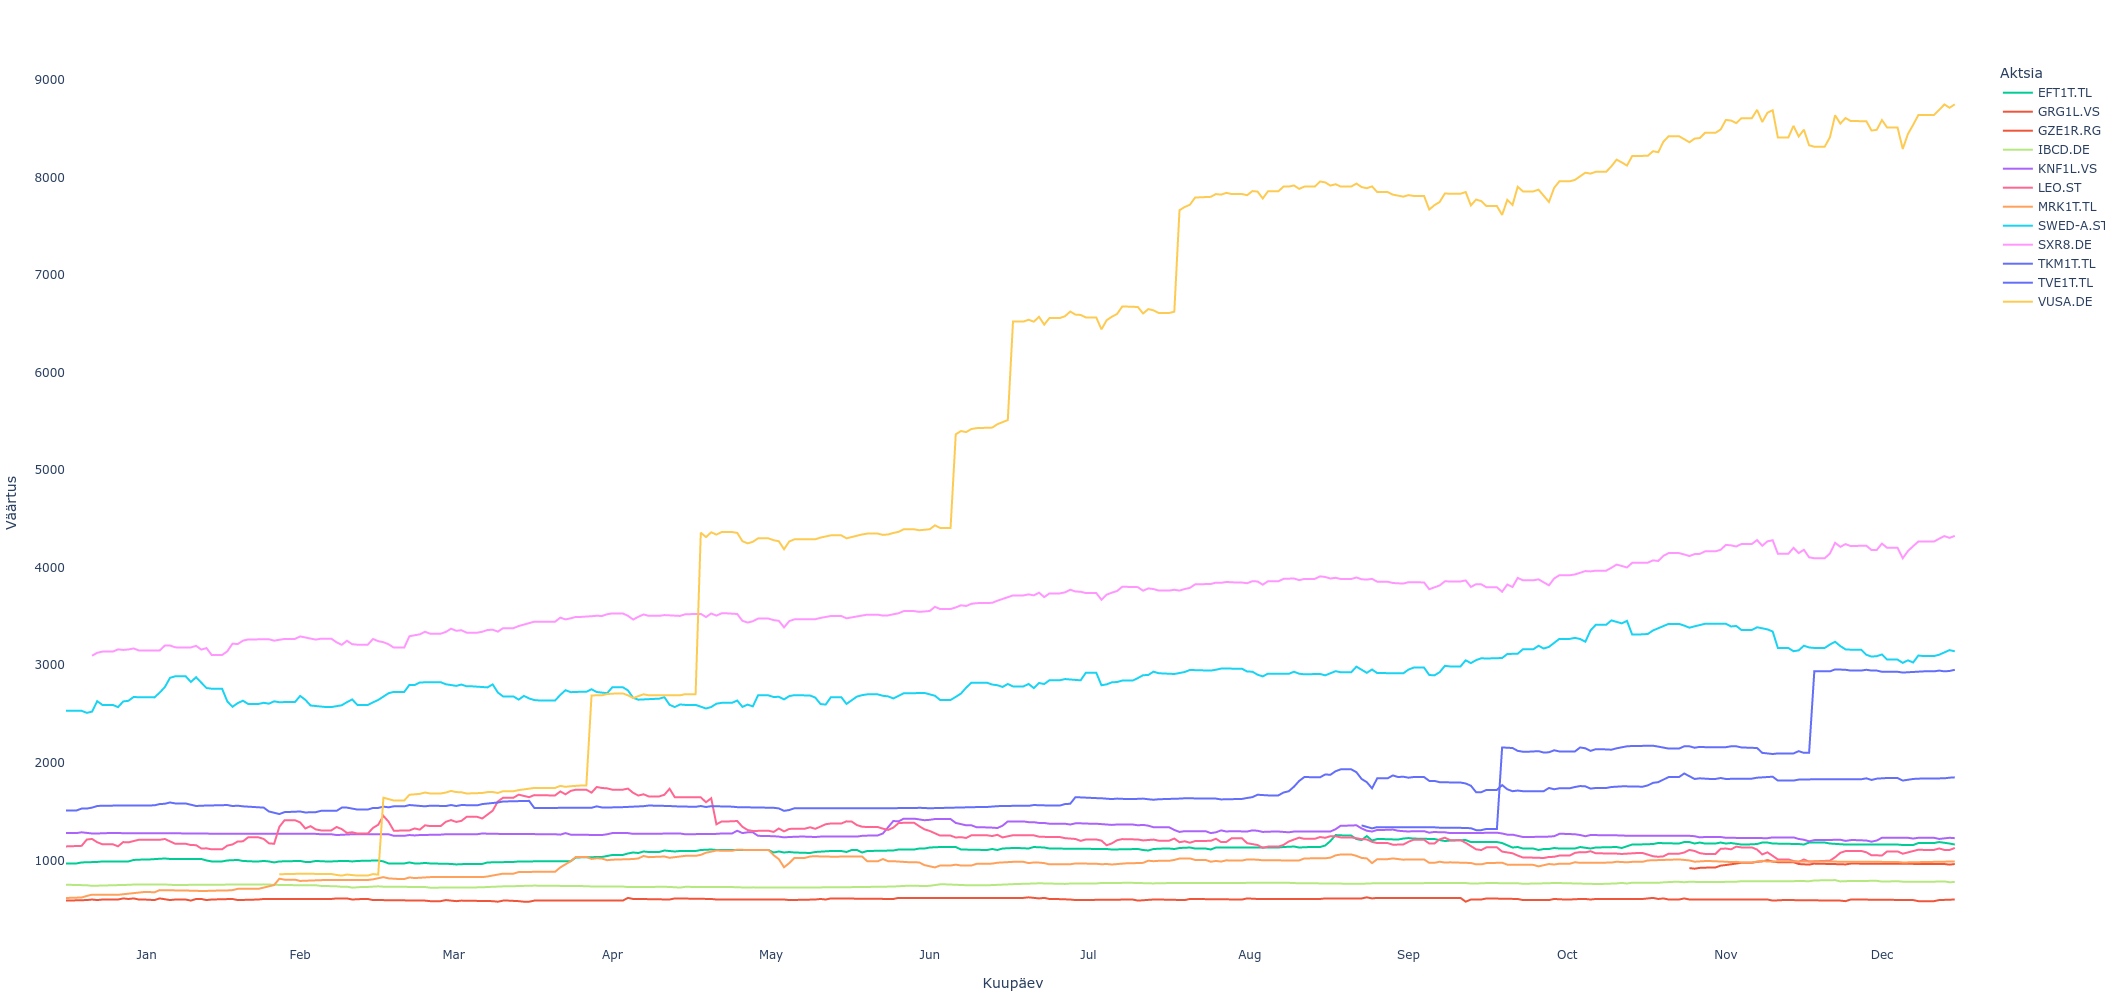

In [44]:
# using Plots
using PlotlyJS

# plotlyjs()

lbls = [x for x in names(yearportfoliodf) if x != "Kuupäev"]
plotdf = stack(yearportfoliodf, lbls)
plotdf = DataFrames.rename(plotdf, ["Kuupäev", "Aktsia", "Väärtus"])
plotdf = plotdf[plotdf."Väärtus" .> 0,:]

layout = Layout(
    xaxis_title="Kuupäev",
    yaxis_title="Väärtus",
    legend_title_text="Aktsiad",
    xaxis=attr(dtick="M1", tickformat="%b", ticklabelmode="period", range=[periodstart, periodend]),
    plot_bgcolor="white",
    width=1800, height=1000,
)

PlotlyJS.plot(plotdf, x=:Kuupäev, y=:Väärtus, color=:Aktsia, legend = :outertopright, layout)


In [16]:
for c in currencies
    range = (alltradesdf."VALUUTA" .== c) .& (alltradesdf."TEHINGUPÄEV" .>= periodstart)
    prices = alltradesdf[range, "KOKKU"]
    days = alltradesdf[range, "TEHINGUPÄEV"]
    rates = [last(currenciesdf[(currenciesdf."timestamp" .<= d) .& (currenciesdf."Ticker" .== c), "Close"]) for d in days]
    alltradesdf[range, "KOKKU"] = prices .* rates
end

In [17]:
invested = -sum(alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), "KOKKU"])

14292.07

In [18]:
growth = sum(last(yearportfoliodf)[1:end-1]) - sum(first(yearportfoliodf)[1:end-1])

18482.152969319086

In [19]:
profit = growth - invested

4190.082969319086

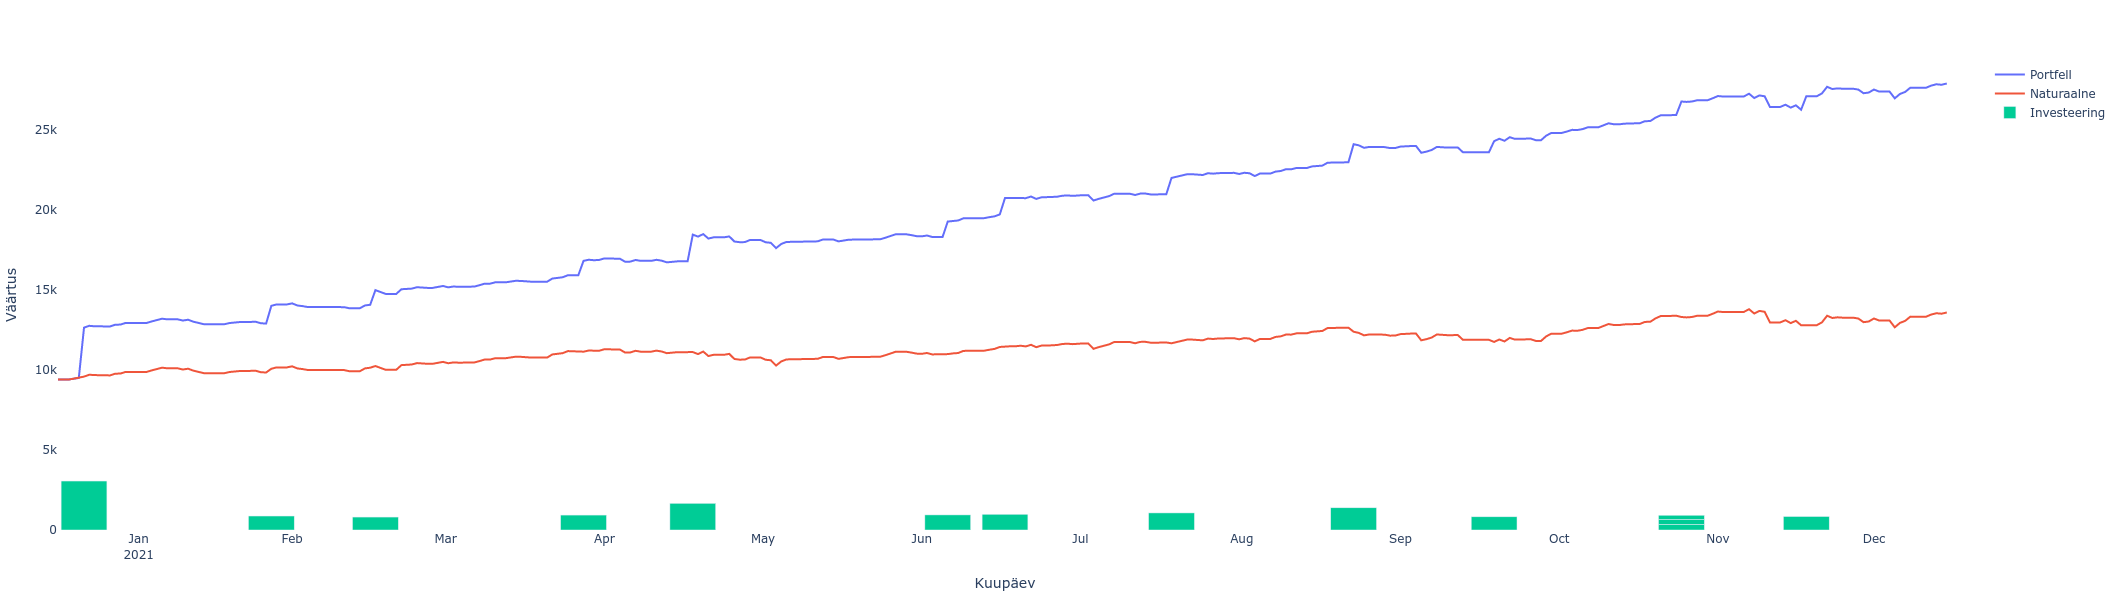

In [20]:
plotdf = plotdf = yearportfoliodf[!, ["Kuupäev"]]
plotdf."KOKKU" = sum.(eachrow(yearportfoliodf[!, names(yearportfoliodf)[1:end-1]]))

df = yearportfoliodf[!, ["Kuupäev"]]
df."KOKKU" = sum.(eachrow(yearportfoliodf[!, names(yearportfoliodf)[1:end-1]]))
yearbuysdf = alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), ["TEHINGUPÄEV", "KOKKU"]]
for row in eachrow(df)
    row."KOKKU" += yearbuysdf[row."Kuupäev" .>= yearbuysdf."TEHINGUPÄEV", "KOKKU"] |> sum
end

df2 = alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), ["TEHINGUPÄEV", "KOKKU"]]
df2."KOKKU" = -df2."KOKKU"

layout = Layout(
    xaxis_title="Kuupäev",
    yaxis_title="Väärtus",
    xaxis=attr(dtick="M1", tickformat="%b\n%Y", ticklabelmode="period", range=[periodstart, periodend]),
    plot_bgcolor="white",
    width=1800, height=600,
    barmode="relative"
)
plot(
    [
     scatter(plotdf, x=:Kuupäev, y=:KOKKU, name="Portfell")
     scatter(df, x=:Kuupäev, y=:KOKKU, name="Naturaalne")
     bar(df2, x=:TEHINGUPÄEV, y=:KOKKU, name="Investeering")
    ],
    layout
)

In [21]:
profitlossfiles = glob("data/*-profit-loss.csv")

5-element Vector{String}:
 "data/2017-profit-loss.csv"
 "data/2018-profit-loss.csv"
 "data/2019-profit-loss.csv"
 "data/2020-profit-loss.csv"
 "data/2021-profit-loss.csv"

In [22]:
allprofitlossdf = reduce(vcat, DataFrame.(CSV.File.(profitlossfiles)));

In [23]:
show(describe(allprofitlossdf), allcols=true)

11×7 DataFrame
 Row │ variable                           mean      min                                median      max                                nmissing  eltype   
     │ Symbol                             Union…    Any                                Any         Any                                Int64     DataType 
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │ Laekumise kuupäev                            2017-12-05                         2021-02-23  2021-11-05                                0  Date
   2 │ Väärtpaber                                   EFT1T - EfTEN Real Estate Fund I…              VUSA - VANGUARD S&P 500 UCITS ETF         0  String
   3 │ Valuuta                                      EUR                                            USD                                       0  String3
   4 │ Laekunud summa aktsia kohta valu…  0.769181  0.0198162          

In [24]:
yearprofitlossdf = allprofitlossdf[(allprofitlossdf."Laekumise kuupäev" .>= periodstart) .& (allprofitlossdf."Laekumise kuupäev" .<= periodend),:]

,Laekumise kuupäev,Väärtpaber,Valuuta,Laekunud summa aktsia kohta valuutas
,Date,String,String3,Float64
1,2021-02-23,SWEDA - Swedbank A,SEK,4.35
2,2021-03-31,LQDA - iShares $ Corp Bond UCITS ETF,USD,0.8556
3,2021-04-02,VUSA - VANGUARD S&P 500 UCITS ETF,USD,0.239961
4,2021-04-05,SWEDA - Swedbank A,SEK,2.9
5,2021-04-09,TKM1T - Tallinna Kaubamaja Grupp,EUR,0.110618
6,2021-04-09,TKM1T - Tallinna Kaubamaja Grupp,EUR,0.489382
7,2021-05-20,LEO - LEOVEGAS AB,SEK,0.4
8,2021-05-24,KNF1L - AB Klaipedos Nafta PVA,EUR,0.0198162
9,2021-06-16,EFT1T - EfTEN Real Estate Fund III,EUR,0.538762


In [25]:
totaldividend = yearprofitlossdf."Kokku EUR" |> sum

538.14

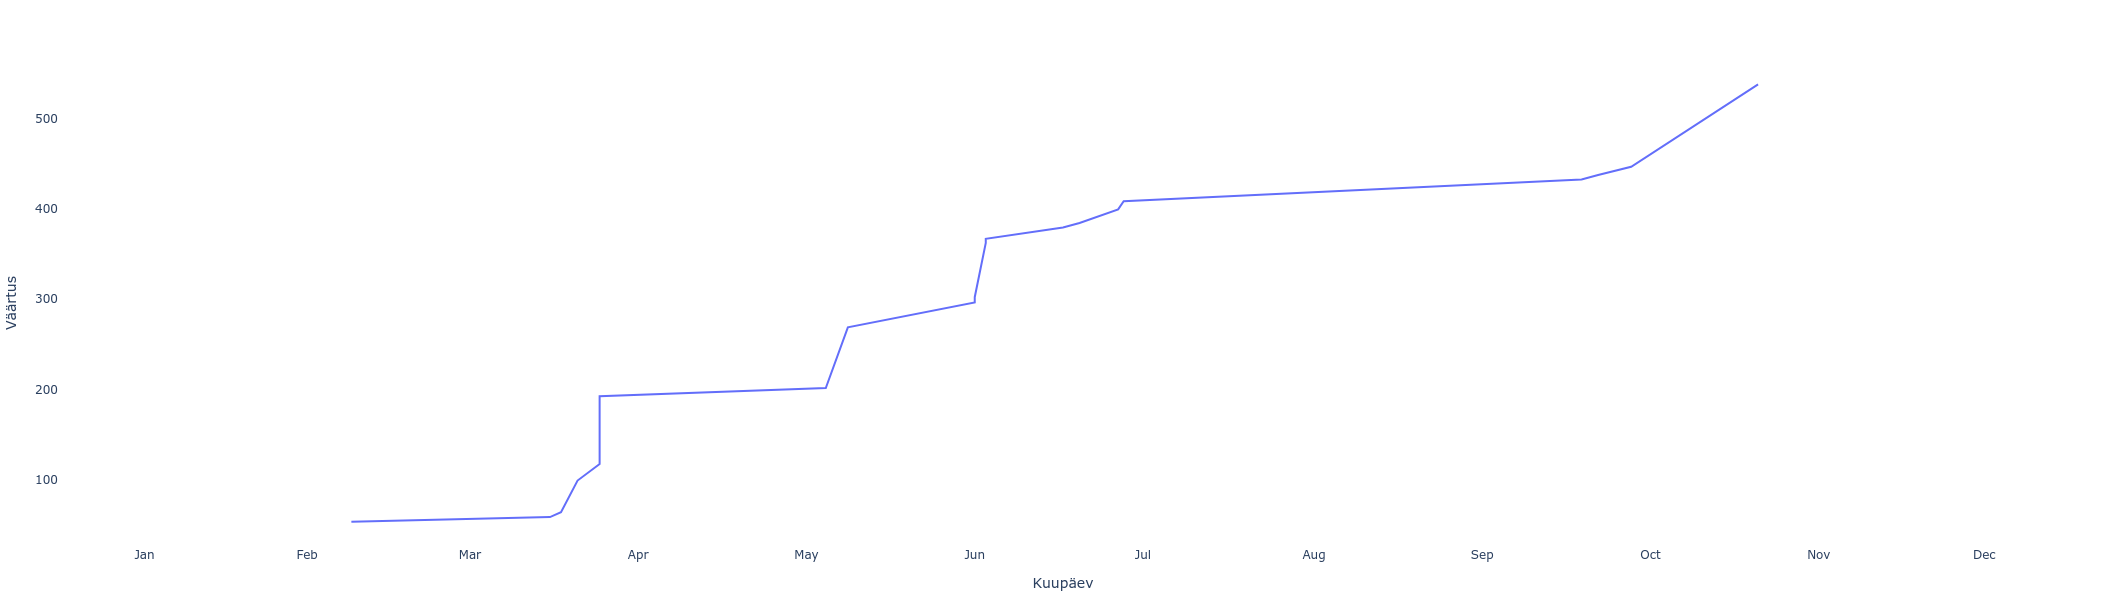

In [26]:
plotdf = DataFrame()
plotdf."Kuupäev" = yearprofitlossdf[!, "Laekumise kuupäev"]
plotdf."Kokku" = cumsum(yearprofitlossdf."Kokku EUR")

layout = Layout(
    xaxis_title="Kuupäev",
    yaxis_title="Väärtus",
    legend_title_text="Aktsiad",
    xaxis=attr(dtick="M1", tickformat="%b", ticklabelmode="period", range=[periodstart, periodend]),
    plot_bgcolor="white",
    width=1800, height=600,
)

PlotlyJS.plot(plotdf, x=:Kuupäev, y=:Kokku, layout)

In [27]:
avg_portfolio = sum.(eachrow(yearportfoliodf[!, names(yearportfoliodf)[1:end-1]])) |> mean
dividend_yield = totaldividend / avg_portfolio

0.026946002221787918

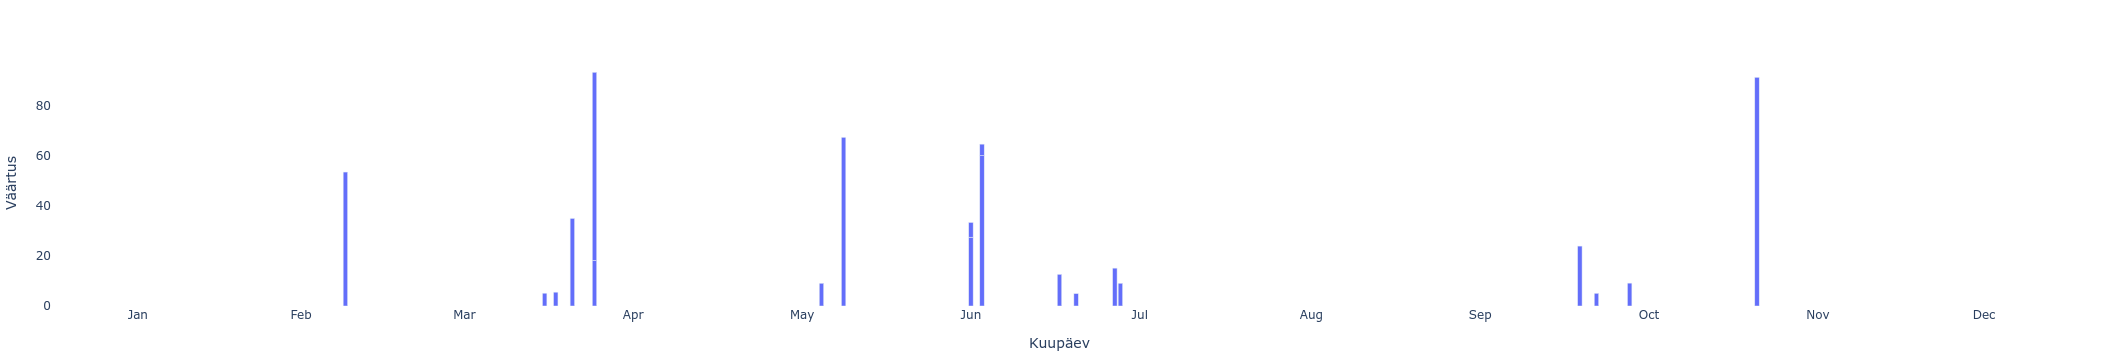

In [28]:
df = DataFrame()
df."Kuupäev" = yearprofitlossdf."Laekumise kuupäev"
df."KOKKU" = yearprofitlossdf."Kokku EUR"

layout = Layout(
    xaxis_title="Kuupäev",
    yaxis_title="Väärtus",
    legend_title_text="Aktsiad",
    xaxis=attr(dtick="M1", tickformat="%b", ticklabelmode="period", range=[periodstart, periodend]),
    plot_bgcolor="white",
)

plot(bar(df, x=:Kuupäev, y=:KOKKU, name="Dividend/Intress"), layout)

In [29]:
df = yearportfoliodf[!, ["Kuupäev"]]
df."Kokku" = sum.(eachrow(yearportfoliodf[!, names(yearportfoliodf)[1:end-1]]))
yearbuysdf = alltradesdf[(alltradesdf."TEHINGUPÄEV" .>= periodstart) .& (alltradesdf."TEHINGUPÄEV" .<= periodend), ["TEHINGUPÄEV", "KOKKU"]]
for row in eachrow(df)
    row."Kokku" += yearbuysdf[row."Kuupäev" .>= yearbuysdf."TEHINGUPÄEV", "KOKKU"] |> sum
end

In [30]:
yearstd = std(df."Kokku")

1128.0727708129396

In [31]:
yearstd / avg_portfolio

0.056485396715843315